Problem Statement

Your client is a meal delivery company which operates in multiple cities. They have various fulfillment centers in these cities for dispatching meal orders to their customers. The client wants you to help these centers with demand forecasting for upcoming weeks so that these centers will plan the stock of raw materials accordingly.

The replenishment of majority of raw materials is done on weekly basis and since the raw material is perishable, the procurement planning is of utmost importance. Secondly, staffing of the centers is also one area wherein accurate demand forecasts are really helpful. Given the following information, the task is to predict the demand for the next 10 weeks (Weeks: 146-155) for the center-meal combinations in the test set:  

Historical data of demand for a product-center combination (Weeks: 1 to 145)
Product(Meal) features such as category, sub-category, current price and discount
Information for fulfillment center like center area, city information etc.


Import Libraries

In [161]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Load Datasets

In [162]:
#Load datasets
train=pd.read_csv("/content/drive/My Drive/Colab Notebooks/food_train.csv")
test=pd.read_csv("/content/drive/My Drive/Colab Notebooks/food_test.csv")
sample_sub=pd.read_csv("/content/drive/My Drive/Colab Notebooks/food_sample_submission.csv")
fulfilment=pd.read_csv("/content/drive/My Drive/Colab Notebooks/food_fulfilment_center_info.csv")
meal=pd.read_csv("/content/drive/My Drive/Colab Notebooks/food_meal.csv")

In [163]:
train

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [164]:
test

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0
...,...,...,...,...,...,...,...,...
32568,1250239,155,61,1543,482.09,484.09,0,0
32569,1039516,155,61,2304,483.09,483.09,0,0
32570,1158107,155,61,2664,322.07,323.07,0,0
32571,1444235,155,61,2569,322.07,323.07,0,0


In [165]:
fulfilment

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
...,...,...,...,...,...
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1


In [166]:
meal

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian
5,1311,Extras,Thai
6,1062,Beverages,Italian
7,1778,Beverages,Italian
8,1803,Extras,Thai
9,1198,Extras,Thai


In [167]:
sample_sub

,id,num_orders
0,1028232,0
1,1127204,0
2,1212707,0
3,1082698,0
4,1400926,0
...,...,...
32568,1250239,0
32569,1039516,0
32570,1158107,0
32571,1444235,0


Merge datasets

In [168]:
#merge datasets
data_train = train.merge(fulfilment, on='center_id', how='left').merge(meal, on='meal_id', how='left')
data_train

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,473,77,TYPE_A,4.5,Desert,Indian
456544,1062036,145,61,2304,482.09,482.09,0,0,42,473,77,TYPE_A,4.5,Desert,Indian
456545,1110849,145,61,2664,237.68,321.07,0,0,501,473,77,TYPE_A,4.5,Salad,Italian
456546,1147725,145,61,2569,243.50,313.34,0,0,729,473,77,TYPE_A,4.5,Salad,Italian


In [169]:
data_test = test.merge(fulfilment, on='center_id', how='left').merge(meal, on='meal_id', how='left')
data_test

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1127204,146,55,1993,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1212707,146,55,2539,157.14,159.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1082698,146,55,2631,162.02,162.02,0,0,647,56,TYPE_C,2.0,Beverages,Indian
4,1400926,146,55,1248,163.93,163.93,0,0,647,56,TYPE_C,2.0,Beverages,Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32568,1250239,155,61,1543,482.09,484.09,0,0,473,77,TYPE_A,4.5,Desert,Indian
32569,1039516,155,61,2304,483.09,483.09,0,0,473,77,TYPE_A,4.5,Desert,Indian
32570,1158107,155,61,2664,322.07,323.07,0,0,473,77,TYPE_A,4.5,Salad,Italian
32571,1444235,155,61,2569,322.07,323.07,0,0,473,77,TYPE_A,4.5,Salad,Italian


Check for Null values

In [170]:
data_train.isnull().sum(), data_test.isnull().sum()

(id                       0
 week                     0
 center_id                0
 meal_id                  0
 checkout_price           0
 base_price               0
 emailer_for_promotion    0
 homepage_featured        0
 num_orders               0
 city_code                0
 region_code              0
 center_type              0
 op_area                  0
 category                 0
 cuisine                  0
 dtype: int64, id                       0
 week                     0
 center_id                0
 meal_id                  0
 checkout_price           0
 base_price               0
 emailer_for_promotion    0
 homepage_featured        0
 city_code                0
 region_code              0
 center_type              0
 op_area                  0
 category                 0
 cuisine                  0
 dtype: int64)

Graphically represent target

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


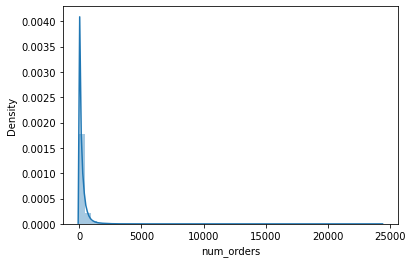

In [171]:
sns.distplot(data_train['num_orders'])

Ordinal encode independant variables

In [172]:
#label encoder
from sklearn import preprocessing
enc = preprocessing.OrdinalEncoder()

data_train.center_type=enc.fit_transform(data_train.center_type.values.reshape(-1,1))
data_train.category=enc.fit_transform(data_train.category.values.reshape(-1,1))
data_train.cuisine=enc.fit_transform(data_train.cuisine.values.reshape(-1,1))

data_test.center_type=enc.fit_transform(data_test.center_type.values.reshape(-1,1))
data_test.category=enc.fit_transform(data_test.category.values.reshape(-1,1))
data_test.cuisine=enc.fit_transform(data_test.cuisine.values.reshape(-1,1))

Graphically represent independant variables

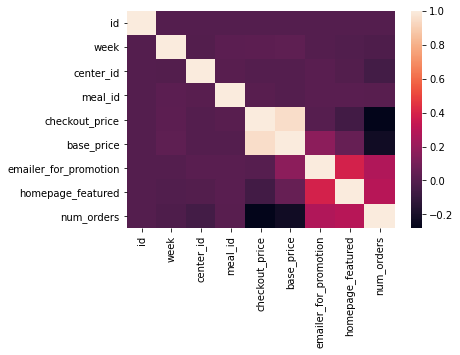

In [173]:
#create a heatmap to correlate survival
plt.figure(figsize=(6,4))
cmap=train.corr()
sns.heatmap(cmap)


Define X, y and X_test

In [174]:
y = train["num_orders"]
X = train.drop(['id', 'num_orders'], axis=1)
X_test = test.drop(['id'], axis=1)

Split dataset for training and testing

In [175]:
#split train set for testing
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.10, random_state=1)
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

((410893, 7), (45655, 7), (410893,), (45655,))

Scaler

In [176]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)
# Scale the train set
X_train = scaler.transform(X_train)
# Scale the validation set
X_val = scaler.transform(X_val)
# Scale the test set
X_test = scaler.transform(X_test)

Model selection

In [177]:
#gradient boosting
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor(max_iter=2000, learning_rate=.01).fit(X_train, Y_train)
model.score(X_train, Y_train)

0.8033726896946414

In [178]:
mse = mean_squared_error(Y_val, model.predict(X_val))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 36934.3801


In [179]:
y_pred = model.predict(X_val)
y_pred[y_pred < 0] = 0
y_pred

array([ 56.61549718, 317.14228257,  72.17815143, ..., 119.92909678,
        45.18801916, 202.43835947])

In [180]:
#accuracy
accuracy = round(model.score(X_val, Y_val) * 100,2)
print(accuracy)

78.19


Make predictions

In [181]:
from sklearn.metrics import mean_squared_log_error

np.sqrt(mean_squared_log_error( Y_val, y_pred )) * 100

78.69391376813284

In [182]:
df=pd.DataFrame({'Actual': Y_val, 'Predicted':y_pred})
df

,Actual,Predicted
230730,42,56.615497
394065,364,317.142283
149461,94,72.178151
1551,82,75.553978
79572,94,97.287047
...,...,...
319294,310,153.135986
71949,215,360.813282
75625,68,119.929097
411675,80,45.188019


In [183]:
test_pred=model.predict(X_test)
test_pred[test_pred < 0] = 0
test_pred

array([384.5331316 , 210.65879804, 163.87669744, ..., 300.62137839,
       281.86865426, 240.08969102])

Make submission

In [184]:
output = pd.DataFrame({'id': test.id, 'num_orders': test_pred})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [185]:
#upload submission
my_submission = pd.read_csv("my_submission.csv")
my_submission

,id,num_orders
0,1028232,384.533132
1,1127204,210.658798
2,1212707,163.876697
3,1082698,12.603870
4,1400926,49.327747
...,...,...
32568,1250239,64.537881
32569,1039516,48.992206
32570,1158107,300.621378
32571,1444235,281.868654
